# DeepSeek - R1

In [1]:
%pip install -qU langchain-ollama
%pip install -U ollama

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="deepseek-r1:14b",
    temperature=0,
    # other params...
)

In [5]:
from langchain_core.messages import AIMessage

messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)


In [6]:
print(ai_msg.content)

<think>
Okay, so I need to translate "I love programming" into French. Let me think about how to do this correctly.

First, let's break down the sentence. The subject is "I," which in French is "Je." Then we have the verb "love," which in French is "aimer." So putting that together, it would be "Je aime."

Wait, but I remember that in French, verbs change based on the subject. For "I love," the correct form is actually "aime" because of the conjugation for the first person singular present tense.

Next, the object is "programming." In French, "programming" translates to "la programmation." So putting it all together, the sentence would be "Je aime la programmation."

Wait a second, I think I might have made a mistake. Let me double-check. The structure should be subject-verb-object. So "I love programming" becomes "Je aime la programmation." That seems right.

But sometimes in French, especially in spoken language, people might drop the article "la" and say "Je aime programmation," but

In [12]:
# using native ollama package
import ollama
response = ollama.chat(
    model="deepseek-r1:14b",
    messages=[
        {"role":"system", "content": "You are a helpful assistant that translates English to French. Translate the user sentence."},
        {"role": "user", "content": "I love programming."},
    ],
)

In [13]:
print(response["message"]["content"])
# response

<think>
Alright, I need to help the user translate "I love programming" into French. Let me start by breaking down each part of the sentence.

"I love" is straightforward in French as "J'aime." The pronoun "I" becomes "je," but it's dropped when using "aime" because it's conjugated for first person singular. So, "J'aime" covers that part.

Next, "programming." In French, this translates to "la programmation." It's a noun, so I need to make sure the article matches. Since "programmation" is feminine, we use "la."

Putting it all together, it should be "J'aime la programmation." Let me double-check if there are any nuances or grammar rules I might have missed. In French, when talking about hobbies or interests, this structure works well. So yes, that translation sounds correct and natural.
</think>

J'aime la programmation.


## Function Calling

In [15]:
from typing import List

from langchain_core.tools import tool
from langchain_ollama import ChatOllama


@tool
def validate_user(user_id: int, addresses: List[str]) -> bool:
    """Validate user using historical addresses.

    Args:
        user_id (int): the user ID.
        addresses (List[str]): Previous addresses as a list of strings.
    """
    return True


llm = ChatOllama(
    model="MFDoom/deepseek-r1-tool-calling:8b",
    temperature=0,
).bind_tools([validate_user])

result = llm.invoke(
    "Could you validate user 123? They previously lived at "
    "123 Fake St in Boston MA and 234 Pretend Boulevard in "
    "Houston TX."
)
result.tool_calls

[{'name': 'validate_user',
  'args': {'addresses': ['123 Fake St', '234 Pretend Boulevard'],
   'user_id': 123},
  'id': '60344dc2-d78e-4ef1-894e-facf8206a13b',
  'type': 'tool_call'}]

## Multimodal


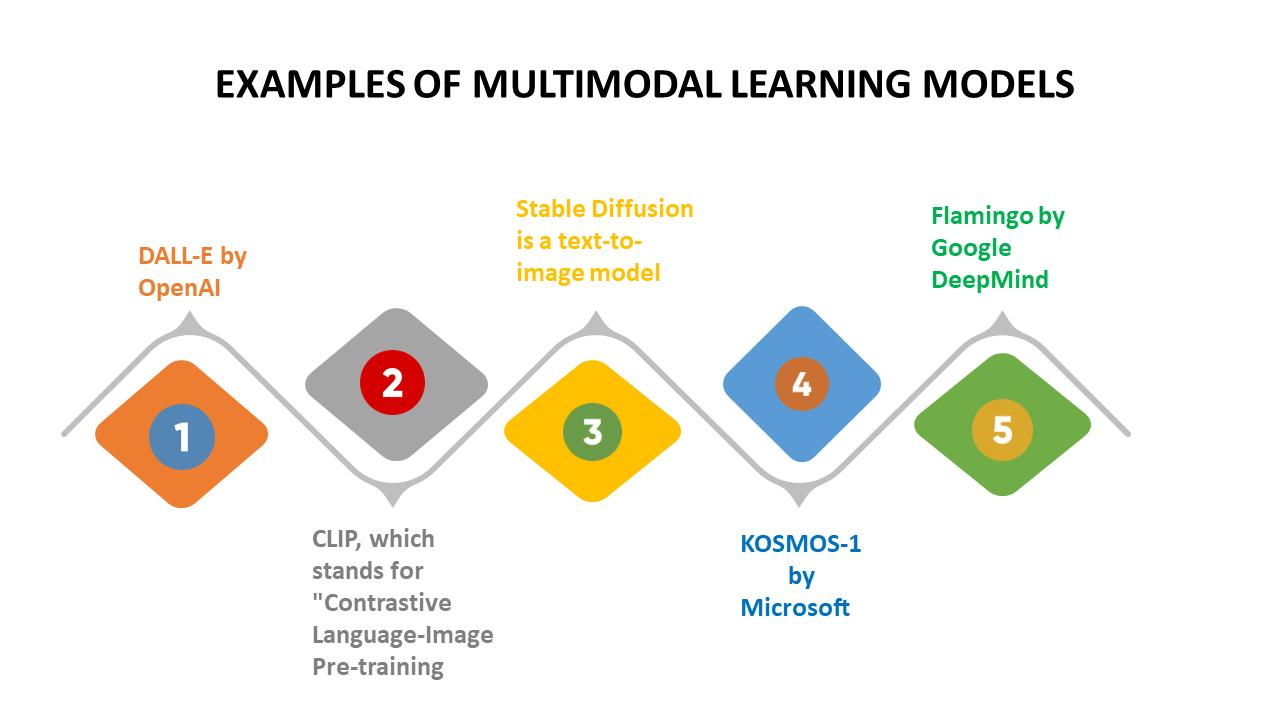

In [17]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "/home/mdsa3d/Desktop/dev/ai_engineering/Multimodal-LLM.png"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [18]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(model="deepseek-r1:14b", temperature=0)


def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "What is the name of multimodal from google?", "image": image_b64}
)

print(query_chain)

<think>
Okay, so I need to figure out what the name of Google's multimodal model is. Hmm, I remember hearing about some big models from Google in AI. There's BERT, which is for language understanding, and then there's something called Multimodal... Maybe it's related to that.

Wait, isn't there a model that can handle both text and images? Oh right, I think it's called VLM, Vision-Language Model. But what's the specific name? I recall that Google has a series of models under different names. There's also Flamingo, but I'm not sure if that's from Google or another company.

Oh, wait! I think it's calledImagen. No, Imagen is more about generating images from text, right? So maybe not the multimodal one. Then there's something else... Oh, perhaps it's called Multimodal Universal Transformer or MUCoT? Or was that a different model?

Wait, another thought: Google has a model called Chinchilla, which is their big language model. But that's just for text. I'm trying to remember if they have a

In [22]:
with open('/home/mdsa3d/Desktop/dev/ai_engineering/prompt/prompt.md', 'r') as file:
    system_prompt = file.read()

# using native ollama package
import ollama
response = ollama.chat(
    model="deepseek-r1:14b",
    messages=[
        {"role":"system", "content": system_prompt},
        {"role": "user", "content": "I love programming."},
    ],
)
response

ChatResponse(model='deepseek-r1:14b', created_at='2025-02-01T04:22:17.429984483Z', done=True, done_reason='stop', total_duration=252219154595, load_duration=6873075510, prompt_eval_count=584, prompt_eval_duration=53309000000, eval_count=790, eval_duration=188927000000, message=Message(role='assistant', content='<think>\nOkay, so I need to help my student who is learning Japanese at the beginner level, specifically targeting JLPT5 preparation. The task here is to take an English sentence they provide and guide them in translating it into Japanese without just giving away the answer. Instead, I\'ll use clues and a structured approach.\n\nFirst, when the student gives me their English sentence, say "I love programming," my goal is to break this down for them. I should start by creating a vocabulary table that includes all the necessary words from their sentence. In this case, the main components are "I" (which translates to "watashi"), "love" ("suki desu," but since we\'re focusing on dic

In [23]:
print(response["message"]["content"])

<think>
Okay, so I need to help my student who is learning Japanese at the beginner level, specifically targeting JLPT5 preparation. The task here is to take an English sentence they provide and guide them in translating it into Japanese without just giving away the answer. Instead, I'll use clues and a structured approach.

First, when the student gives me their English sentence, say "I love programming," my goal is to break this down for them. I should start by creating a vocabulary table that includes all the necessary words from their sentence. In this case, the main components are "I" (which translates to "watashi"), "love" ("suki desu," but since we're focusing on dictionary forms, it'll be "sukai" and "desu"), and "programming" ("keizoku hō sōru"). I should ensure that each word is listed only once, even if they appear multiple times in the sentence.

Next, I need to outline a possible sentence structure. Since this is an affirmative statement expressing a personal feeling, the 